# PSTAT134 Final Project
## Predicting NBA Player Positions

In [1]:
import pandas as pd
import numpy as np
import csv
import sklearn.decomposition as skld

import matplotlib.pyplot as plt
import seaborn as sns

import helper_basketball as h
import imp
imp.reload(h);

## 2017-2018 Season
Position less basketball is harder to predict? Compare against 2009-2010 data.

In [2]:
#import data
agg_DF = pd.read_csv('NBAPlayerData.csv')

#rename one column
agg_DF.rename(columns = {'PS/G': 'PTS'}, inplace = True)
agg_DF.rename(columns = {'FG%': 'FGP'}, inplace = True)
agg_DF.rename(columns = {'3P%': '3PP'}, inplace = True)
agg_DF.rename(columns = {'2P%': '2PP'}, inplace = True)
agg_DF.rename(columns = {'eFG%': 'eFGP'}, inplace = True)
agg_DF.rename(columns = {'FT%': 'FTP'}, inplace = True)

agg_DF.drop('\ufeffRk', axis = 1, inplace = True)

agg_DF

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,0.395,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,0.356,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,0.629,...,0.557,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,0.512,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,0.401,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4
5,Cole Aldrich,C,29,MIN,21,0,2.3,0.2,0.7,0.333,...,0.333,0.1,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6
6,LaMarcus Aldridge,C,32,SAS,75,75,33.5,9.2,18.0,0.510,...,0.837,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.2,23.1
7,Jarrett Allen,C,19,BRK,72,31,20.0,3.3,5.5,0.589,...,0.776,2.0,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2
8,Kadeem Allen,PG,25,BOS,18,1,5.9,0.3,1.2,0.273,...,0.778,0.2,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1
9,Tony Allen,SF,36,NOP,22,0,12.4,2.0,4.1,0.484,...,0.524,0.9,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7


In [3]:
agg_DF.shape

(664, 29)

In [4]:
agg_DF.isnull()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
#Check for missing values
agg_DF.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FGP        4
3P         0
3PA        0
3PP       65
2P         0
2PA        0
2PP       18
eFGP       4
FT         0
FTA        0
FTP       58
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [6]:
agg_DF = agg_DF.fillna('0')

In [7]:
agg_DF.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FGP       0
3P        0
3PA       0
3PP       0
2P        0
2PA       0
2PP       0
eFGP      0
FT        0
FTA       0
FTP       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

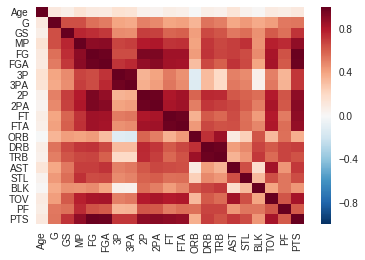

In [8]:
sns.heatmap(agg_DF.corr())
plt.show()

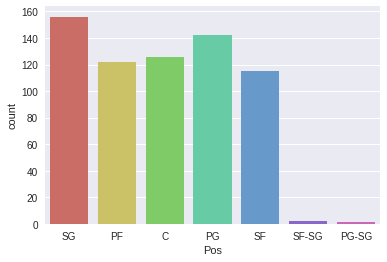

In [9]:
agg_DF['Pos'].value_counts()
sns.countplot(x = 'Pos', data = agg_DF, palette = 'hls')

In [10]:
agg_DF.groupby('Pos').mean()

,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,26.619048,47.817460,22.166667,16.915873,2.885714,5.457143,0.228571,0.682540,2.650794,4.773810,...,1.807937,1.481746,3.560317,5.040476,1.135714,0.476190,0.655556,1.018254,1.870635,7.267460
PF,25.877049,45.000000,20.647541,18.926230,3.163115,6.822951,0.815574,2.285246,2.354918,4.545082,...,1.677049,0.990164,3.231148,4.216393,1.322951,0.512295,0.440984,0.962295,1.663115,8.402459
PG,26.330986,40.197183,19.119718,19.521831,3.081690,7.249296,0.841549,2.453521,2.236620,4.794366,...,1.830282,0.442958,1.898592,2.347183,3.169718,0.725352,0.195775,1.414789,1.544366,8.461972
PG-SG,26.000000,20.000000,1.000000,21.100000,2.600000,6.900000,1.100000,3.300000,1.500000,3.600000,...,2.600000,0.300000,2.000000,2.300000,3.800000,0.800000,0.100000,1.500000,1.800000,8.600000
SF,26.165217,40.556522,20.408696,18.143478,2.479130,5.759130,0.818261,2.386957,1.660000,3.375652,...,1.244348,0.573913,2.180000,2.749565,1.142609,0.598261,0.284348,0.787826,1.448696,6.726957
SF-SG,28.000000,57.500000,10.000000,13.250000,2.000000,4.400000,0.300000,1.050000,1.650000,3.300000,...,1.250000,0.550000,1.350000,1.950000,0.600000,0.650000,0.150000,0.400000,1.300000,5.150000
SG,25.974359,43.051282,17.250000,19.414744,3.042949,7.144872,1.107051,3.074359,1.939103,4.074359,...,1.501282,0.386538,1.923718,2.305128,1.716026,0.653205,0.225641,1.028205,1.428846,8.380769


Text(0.5,1,'Spread of Positions Per Team')

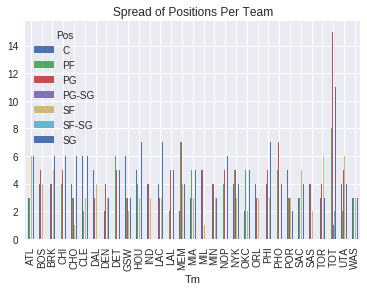

In [11]:
%matplotlib inline
pd.crosstab(agg_DF.Tm, agg_DF.Pos).plot(kind='bar')
plt.title('Spread of Positions Per Team')

In [12]:
agg_DF.columns.values

array(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP',
       '3P', '3PA', '3PP', '2P', '2PA', '2PP', 'eFGP', 'FT', 'FTA', 'FTP',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], dtype=object)

In [13]:
agg_DF.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FGP        object
3P        float64
3PA       float64
3PP        object
2P        float64
2PA       float64
2PP        object
eFGP       object
FT        float64
FTA       float64
FTP        object
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [14]:
agg_DF['FGP'] = pd.to_numeric(agg_DF['FGP'])
agg_DF['3PP'] = pd.to_numeric(agg_DF['3PP'])
agg_DF['2PP'] = pd.to_numeric(agg_DF['2PP'])
agg_DF['eFGP'] = pd.to_numeric(agg_DF['eFGP'])
agg_DF['FTP'] = pd.to_numeric(agg_DF['FTP'])

#OneHotEncoder
agg_DV = pd.get_dummies(agg_DF, columns = ['Player', 'Tm'])

In [15]:
#looking at 5 positions dataframe
agg_DV

,Pos,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,SG,24,75,8,15.1,1.5,3.9,0.395,1.1,2.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PF,27,70,8,19.4,1.9,5.2,0.356,1.5,4.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C,24,76,76,32.7,5.9,9.4,0.629,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C,20,69,19,19.8,2.5,4.9,0.512,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SG,32,53,3,12.9,1.2,3.1,0.401,0.5,1.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C,29,21,0,2.3,0.2,0.7,0.333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,C,32,75,75,33.5,9.2,18.0,0.510,0.4,1.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,C,19,72,31,20.0,3.3,5.5,0.589,0.1,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,PG,25,18,1,5.9,0.3,1.2,0.273,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,SF,36,22,0,12.4,2.0,4.1,0.484,0.2,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
agg_DV3 = agg_DV.copy()
agg_DV.Pos.unique()

array(['SG', 'PF', 'C', 'PG', 'SF', 'SF-SG', 'PG-SG'], dtype=object)

In [17]:
for i in range(0, 664):
    if agg_DV3.Pos.iloc[i] == 'PG' or agg_DV3.Pos.iloc[i] == 'SG' or agg_DV3.Pos.iloc[i] == 'PG-SG':
        agg_DV3.Pos.iloc[i] = 'G'
    elif agg_DV3.Pos.iloc[i] == 'SF' or agg_DV3.Pos.iloc[i] == 'SF-SG':
        agg_DV3.Pos.iloc[i] = 'F'
    else:
        agg_DV3.Pos.iloc[i] = 'C'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
#3 position dataframe
agg_DV3

,Pos,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,G,24,75,8,15.1,1.5,3.9,0.395,1.1,2.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C,27,70,8,19.4,1.9,5.2,0.356,1.5,4.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C,24,76,76,32.7,5.9,9.4,0.629,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C,20,69,19,19.8,2.5,4.9,0.512,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,G,32,53,3,12.9,1.2,3.1,0.401,0.5,1.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,C,29,21,0,2.3,0.2,0.7,0.333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,C,32,75,75,33.5,9.2,18.0,0.510,0.4,1.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,C,19,72,31,20.0,3.3,5.5,0.589,0.1,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,G,25,18,1,5.9,0.3,1.2,0.273,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,F,36,22,0,12.4,2.0,4.1,0.484,0.2,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3 Position Analysis

In [19]:
X3 = agg_DV3.iloc[:,1:]
X3
y3 = agg_DV3.iloc[:,0]
y3

0      G
1      C
2      C
3      C
4      G
5      C
6      C
7      C
8      G
9      F
10     C
11     F
12     F
13     C
14     C
15     C
16     C
17     F
18     G
19     F
20     C
21     G
22     C
23     C
24     C
25     G
26     F
27     F
28     F
29     G
      ..
634    C
635    G
636    C
637    G
638    C
639    G
640    F
641    F
642    F
643    C
644    F
645    C
646    C
647    G
648    C
649    C
650    C
651    G
652    C
653    G
654    G
655    G
656    C
657    C
658    C
659    C
660    C
661    F
662    C
663    C
Name: Pos, dtype: object

## Logistic Regression
Looking at G, F, C positions only

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

In [21]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [22]:
LR_classifier3 = LogisticRegression(random_state = 42)
LR_classifier3.fit(X_train3, Y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
Y_pred3 = LR_classifier3.predict(X_test3)

In [24]:
LR_CM3 = confusion_matrix(Y_test3, Y_pred3)
print(LR_CM3)

[[44  1  1]
 [ 6  6 12]
 [ 5  3 55]]


In [25]:
LR_classifier3.score(X_test3, Y_test3) 

0.78947368421052633

In [26]:
print(classification_report(Y_test3, Y_pred3))

             precision    recall  f1-score   support

          C       0.80      0.96      0.87        46
          F       0.60      0.25      0.35        24
          G       0.81      0.87      0.84        63

avg / total       0.77      0.79      0.76       133



## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DT_classifier3 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                  max_depth = 3, min_samples_leaf = 5)
DT_classifier3.fit(X_train3, Y_train3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [29]:
DT_pred3 = DT_classifier3.predict(X_test3)

In [30]:
DT_CM3 = confusion_matrix(Y_test3, DT_pred3)
print(DT_CM3)

[[40  0  6]
 [ 7  0 17]
 [ 2  0 61]]


In [31]:
DT_classifier3.score(X_test3, Y_test3) 

0.75939849624060152

In [32]:
print(classification_report(Y_test3, DT_pred3))

             precision    recall  f1-score   support

          C       0.82      0.87      0.84        46
          F       0.00      0.00      0.00        24
          G       0.73      0.97      0.83        63

avg / total       0.63      0.76      0.68       133



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RF_classifier3 = RandomForestClassifier()
RF_classifier3.fit(X_train3, Y_train3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
RF_pred3 = RF_classifier3.predict(X_test3)

In [36]:
RF_CM3 = confusion_matrix(Y_test3, RF_pred3)
print(RF_CM3)

[[36  3  7]
 [ 8  4 12]
 [ 7  2 54]]


In [37]:
RF_classifier3.score(X_test3, Y_test3) 

0.70676691729323304

In [38]:
print(classification_report(Y_test3, RF_pred3))

             precision    recall  f1-score   support

          C       0.71      0.78      0.74        46
          F       0.44      0.17      0.24        24
          G       0.74      0.86      0.79        63

avg / total       0.67      0.71      0.68       133



# 5 Position Analysis

In [39]:
X = agg_DV.iloc[:,1:]
X
y = agg_DV.iloc[:,0]
y

0      SG
1      PF
2       C
3       C
4      SG
5       C
6       C
7       C
8      PG
9      SF
10     PF
11     SF
12     SF
13     PF
14      C
15     PF
16     PF
17     SF
18     PG
19     SF
20     PF
21     SG
22      C
23      C
24      C
25     PG
26     SF
27     SF
28     SF
29     SG
       ..
634    PF
635    SG
636    PF
637    SG
638    PF
639    SG
640    SF
641    SF
642    SF
643    PF
644    SF
645    PF
646     C
647    PG
648    PF
649    PF
650    PF
651    PG
652    PF
653    SG
654    PG
655    SG
656    PF
657     C
658     C
659     C
660     C
661    SF
662     C
663     C
Name: Pos, dtype: object

## Logistic Regression
Looking at PG, SG, SF, PF, C

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import datasets
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 12)
rfe = rfe.fit(agg_DF_final[ind_var], agg_DF_final[response])
print(rfe.support_)
print(rfe.ranking_)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
X_train.shape

(531, 597)

In [43]:
X_test.shape

(133, 597)

In [44]:
Y_train.shape

(531,)

In [45]:
Y_test.shape

(133,)

In [46]:
LR_classifier = LogisticRegression(random_state = 42)
LR_classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
Y_pred = LR_classifier.predict(X_test)

In [48]:
LR_CM = confusion_matrix(Y_test, Y_pred)
print(LR_CM)

[[18  4  1  0  0  0]
 [ 4 10  2  4  0  2]
 [ 2  1 20  1  0  2]
 [ 3  3  4 10  0  6]
 [ 0  0  0  1  0  1]
 [ 2  4  3  6  0 19]]


In [49]:
LR_classifier.score(X_test, Y_test)

0.57894736842105265

In [50]:
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          C       0.62      0.78      0.69        23
         PF       0.45      0.45      0.45        22
         PG       0.67      0.77      0.71        26
         SF       0.45      0.38      0.42        26
      SF-SG       0.00      0.00      0.00         2
         SG       0.63      0.56      0.59        34

avg / total       0.56      0.58      0.57       133



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
DT_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                  max_depth = 3, min_samples_leaf = 5)
DT_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [53]:
DT_pred = DT_classifier.predict(X_test)

In [54]:
DT_CM = confusion_matrix(Y_test, DT_pred)
print(DT_CM)

[[11  7  1  0  0  4]
 [ 1 12  3  0  0  6]
 [ 0  3 13  0  0 10]
 [ 1  8  6  0  0 11]
 [ 0  1  0  0  0  1]
 [ 0  4 12  0  0 18]]


In [55]:
DT_classifier.score(X_test, Y_test) 

0.40601503759398494

In [56]:
print(classification_report(Y_test, DT_pred))

             precision    recall  f1-score   support

          C       0.85      0.48      0.61        23
         PF       0.34      0.55      0.42        22
         PG       0.37      0.50      0.43        26
         SF       0.00      0.00      0.00        26
      SF-SG       0.00      0.00      0.00         2
         SG       0.36      0.53      0.43        34

avg / total       0.37      0.41      0.37       133



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
RF_pred = RF_classifier.predict(X_test)

In [60]:
RF_CM = confusion_matrix(Y_test, RF_pred)
print(RF_CM)

[[14  3  3  3  0  0]
 [ 7 11  1  2  0  1]
 [ 0  3 18  1  0  4]
 [ 5  6  8  3  0  4]
 [ 0  0  0  1  0  1]
 [ 1  8 15  4  0  6]]


In [61]:
RF_classifier.score(X_test, Y_test) 

0.39097744360902253

In [62]:
print(classification_report(Y_test, RF_pred))

             precision    recall  f1-score   support

          C       0.52      0.61      0.56        23
         PF       0.35      0.50      0.42        22
         PG       0.40      0.69      0.51        26
         SF       0.21      0.12      0.15        26
      SF-SG       0.00      0.00      0.00         2
         SG       0.38      0.18      0.24        34

avg / total       0.36      0.39      0.36       133



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 2009-2010 NBA Data
There was a different "meta" in the NBA in 2009. Positions were more set and big men were more prevalent. Can we get more accurate numbers?

In [63]:
#import data
agg_2009 = pd.read_csv('NBA2009Data.csv')

#rename one column
agg_2009.rename(columns = {'PS/G': 'PTS'}, inplace = True)
agg_2009.rename(columns = {'FG%': 'FGP'}, inplace = True)
agg_2009.rename(columns = {'3P%': '3PP'}, inplace = True)
agg_2009.rename(columns = {'2P%': '2PP'}, inplace = True)
agg_2009.rename(columns = {'eFG%': 'eFGP'}, inplace = True)
agg_2009.rename(columns = {'FT%': 'FTP'}, inplace = True)

agg_2009.drop('\ufeffRk', axis = 1, inplace = True)

agg_2009

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alex Acker,SG,26,TOT,25,0,8.0,1.2,3.0,0.395,...,0.500,0.3,0.6,1.0,0.5,0.2,0.2,0.3,0.4,2.9
1,Alex Acker,SG,26,DET,7,0,2.9,0.6,1.6,0.364,...,0.500,0.0,0.3,0.3,0.1,0.3,0.1,0.0,0.0,1.3
2,Alex Acker,SG,26,LAC,18,0,9.9,1.4,3.6,0.400,...,0.500,0.4,0.8,1.2,0.6,0.2,0.2,0.4,0.5,3.5
3,Hassan Adams,SG,24,TOR,12,0,4.3,0.3,1.1,0.308,...,0.500,0.1,0.5,0.6,0.1,0.1,0.1,0.3,0.3,0.9
4,Arron Afflalo,SG,23,DET,74,8,16.7,1.8,4.1,0.437,...,0.817,0.4,1.4,1.8,0.6,0.4,0.2,0.6,1.9,4.9
5,Maurice Ager,SG,24,NJN,20,0,4.9,0.8,2.2,0.349,...,0.500,0.2,0.4,0.5,0.2,0.1,0.1,0.2,0.9,1.7
6,Blake Ahearn,PG,24,SAS,3,0,6.3,0.7,2.0,0.333,...,1.000,0.0,0.3,0.3,0.7,0.3,0.0,0.3,1.0,2.7
7,Alexis Ajinca,PF,20,CHA,31,4,5.9,0.8,2.2,0.362,...,0.714,0.3,0.7,1.0,0.1,0.2,0.2,0.4,1.1,2.3
8,LaMarcus Aldridge,PF,23,POR,81,81,37.1,7.4,15.3,0.484,...,0.781,2.9,4.6,7.5,1.9,1.0,1.0,1.5,2.6,18.1
9,Joe Alexander,SF,22,MIL,59,0,12.1,1.7,4.2,0.416,...,0.699,0.7,1.2,1.9,0.7,0.3,0.5,0.9,1.8,4.7


In [64]:
list(agg_2009)

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FGP',
 '3P',
 '3PA',
 '3PP',
 '2P',
 '2PA',
 '2PP',
 'eFGP',
 'FT',
 'FTA',
 'FTP',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [65]:
agg_2009.shape

(582, 29)

In [66]:
agg_2009.isnull().sum()

Player      0
Pos         0
Age         0
Tm          0
G           0
GS          0
MP          0
FG          0
FGA         0
FGP         4
3P          0
3PA         0
3PP       102
2P          0
2PA         0
2PP         5
eFGP        4
FT          0
FTA         0
FTP        26
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
dtype: int64

In [67]:
agg_2009 = agg_2009.fillna('0')

In [68]:
agg_2009.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FGP       0
3P        0
3PA       0
3PP       0
2P        0
2PA       0
2PP       0
eFGP      0
FT        0
FTA       0
FTP       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

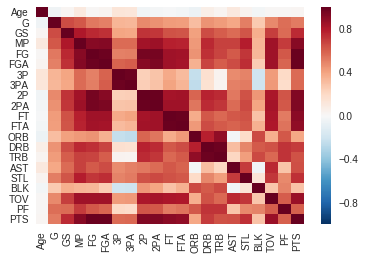

In [69]:
sns.heatmap(agg_2009.corr())
plt.show()

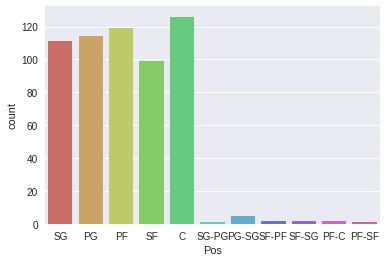

In [70]:
agg_2009['Pos'].value_counts()
sns.countplot(x = 'Pos', data = agg_2009, palette = 'hls')

In [71]:
agg_2009.groupby('Pos').mean()

,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,26.912698,45.865079,22.174603,17.610317,2.603175,5.181746,0.057937,0.176190,2.541270,5.000794,...,1.953968,1.573016,3.165079,4.739683,0.800794,0.377778,0.808730,0.977778,2.103175,6.596825
PF,26.647059,43.361345,20.285714,18.294958,2.920168,6.240336,0.350420,0.954622,2.568908,5.281513,...,1.936134,1.305882,2.991597,4.298319,0.927731,0.490756,0.431933,1.011765,1.927731,7.609244
PF-C,30.000000,60.000000,32.500000,26.150000,4.950000,10.200000,0.300000,0.950000,4.650000,9.200000,...,2.900000,2.100000,4.750000,6.900000,1.450000,0.550000,0.300000,1.500000,2.850000,12.350000
PF-SF,29.000000,76.000000,18.000000,26.200000,3.900000,9.200000,1.600000,4.100000,2.300000,5.100000,...,2.400000,0.700000,4.000000,4.800000,1.300000,0.500000,0.400000,1.500000,3.400000,11.400000
PG,27.184211,48.429825,23.894737,20.628070,2.809649,6.704386,0.685965,1.932456,2.127193,4.777193,...,1.900000,0.383333,1.700877,2.076316,3.373684,0.742105,0.115789,1.332456,1.558772,7.836842
PG-SG,26.400000,53.000000,29.200000,25.500000,3.700000,8.880000,0.720000,2.060000,2.980000,6.840000,...,2.940000,0.520000,1.960000,2.480000,3.180000,0.820000,0.140000,1.640000,1.480000,10.420000
SF,26.383838,53.000000,29.585859,22.563636,3.319192,7.522222,0.754545,2.104040,2.565657,5.418182,...,2.068687,0.830303,2.681818,3.506061,1.513131,0.691919,0.376768,1.093939,1.776768,9.011111
SF-PF,34.500000,40.000000,1.000000,11.800000,1.500000,3.450000,0.000000,0.100000,1.500000,3.400000,...,1.050000,0.550000,1.600000,2.150000,0.750000,0.250000,0.100000,0.750000,1.800000,3.750000
SF-SG,27.000000,60.500000,28.000000,24.450000,3.200000,7.750000,0.900000,2.400000,2.300000,5.350000,...,1.850000,0.550000,2.700000,3.300000,1.950000,1.200000,0.500000,1.150000,1.650000,8.750000


Text(0.5,1,'Spread of Positions Per Team')

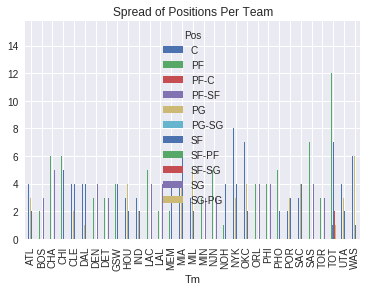

In [72]:
%matplotlib inline
pd.crosstab(agg_2009.Tm, agg_2009.Pos).plot(kind='bar')
plt.title('Spread of Positions Per Team')

In [73]:
agg_2009.columns.values

array(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP',
       '3P', '3PA', '3PP', '2P', '2PA', '2PP', 'eFGP', 'FT', 'FTA', 'FTP',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], dtype=object)

In [74]:
agg_2009.dtypes

Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FGP        object
3P        float64
3PA       float64
3PP        object
2P        float64
2PA       float64
2PP        object
eFGP       object
FT        float64
FTA       float64
FTP        object
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
dtype: object

In [75]:
agg_2009['FGP'] = pd.to_numeric(agg_2009['FGP'])
agg_2009['3PP'] = pd.to_numeric(agg_2009['3PP'])
agg_2009['2PP'] = pd.to_numeric(agg_2009['2PP'])
agg_2009['eFGP'] = pd.to_numeric(agg_2009['eFGP'])
agg_2009['FTP'] = pd.to_numeric(agg_2009['FTP'])

#OneHotEncoder
agg_2009DV = pd.get_dummies(agg_2009, columns = ['Player', 'Tm'])

In [76]:
agg_2009DV

,Pos,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,SG,26,25,0,8.0,1.2,3.0,0.395,0.3,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,SG,26,7,0,2.9,0.6,1.6,0.364,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SG,26,18,0,9.9,1.4,3.6,0.400,0.4,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SG,24,12,0,4.3,0.3,1.1,0.308,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,SG,23,74,8,16.7,1.8,4.1,0.437,0.6,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,SG,24,20,0,4.9,0.8,2.2,0.349,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,PG,24,3,0,6.3,0.7,2.0,0.333,0.7,1.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,PF,20,31,4,5.9,0.8,2.2,0.362,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,PF,23,81,81,37.1,7.4,15.3,0.484,0.1,0.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,SF,22,59,0,12.1,1.7,4.2,0.416,0.3,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
agg_2009DV3 = agg_2009DV.copy()
agg_2009DV3.Pos.unique()

array(['SG', 'PG', 'PF', 'SF', 'C', 'SG-PG', 'PG-SG', 'SF-PF', 'SF-SG',
       'PF-C', 'PF-SF'], dtype=object)

In [78]:
for i in range(0, 582):
    if agg_2009DV3.Pos.iloc[i] == 'PG' or agg_2009DV3.Pos.iloc[i] == 'SG' or agg_2009DV3.Pos.iloc[i] == 'PG-SG' or agg_2009DV3.Pos.iloc[i] == 'SG-PG':
        agg_2009DV3.Pos.iloc[i] = 'G'
    elif agg_2009DV3.Pos.iloc[i] == 'SF' or agg_2009DV3.Pos.iloc[i] == 'SF-SG' or agg_2009DV3.Pos.iloc[i] == 'SF-PF':
        agg_2009DV3.Pos.iloc[i] = 'F'
    else:
        agg_2009DV3.Pos.iloc[i] = 'C'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [79]:
agg_2009DV3

,Pos,Age,G,GS,MP,FG,FGA,FGP,3P,3PA,...,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
0,G,26,25,0,8.0,1.2,3.0,0.395,0.3,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,G,26,7,0,2.9,0.6,1.6,0.364,0.0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,G,26,18,0,9.9,1.4,3.6,0.400,0.4,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,G,24,12,0,4.3,0.3,1.1,0.308,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,G,23,74,8,16.7,1.8,4.1,0.437,0.6,1.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,G,24,20,0,4.9,0.8,2.2,0.349,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,G,24,3,0,6.3,0.7,2.0,0.333,0.7,1.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,C,20,31,4,5.9,0.8,2.2,0.362,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,C,23,81,81,37.1,7.4,15.3,0.484,0.1,0.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,F,22,59,0,12.1,1.7,4.2,0.416,0.3,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3 Position Analysis
G, F, C

In [80]:
X3_2009 = agg_2009DV3.iloc[:,1:]
X3_2009
y3_2009 = agg_2009DV3.iloc[:,0]
y3_2009

0      G
1      G
2      G
3      G
4      G
5      G
6      G
7      C
8      C
9      F
10     C
11     G
12     G
13     G
14     G
15     G
16     G
17     C
18     C
19     C
20     F
21     C
22     G
23     F
24     C
25     C
26     G
27     G
28     G
29     G
      ..
552    G
553    G
554    G
555    C
556    F
557    C
558    C
559    C
560    G
561    G
562    F
563    G
564    G
565    C
566    F
567    G
568    C
569    F
570    C
571    C
572    C
573    F
574    F
575    C
576    F
577    F
578    C
579    G
580    C
581    G
Name: Pos, dtype: object

## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report

In [82]:
X_train3_2009, X_test3_2009, Y_train3_2009, Y_test3_2009 = train_test_split(X3_2009, y3_2009, test_size = 0.2, random_state = 42)

In [83]:
LR_classifier3_2009 = LogisticRegression(random_state = 42)
LR_classifier3_2009.fit(X_train3_2009, Y_train3_2009)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
Y_pred3_2009 = LR_classifier3_2009.predict(X_test3_2009)

In [85]:
LR_CM3_2009 = confusion_matrix(Y_test3_2009, Y_pred3_2009)
print(LR_CM3_2009)

[[44  0  1]
 [ 9  6  8]
 [ 1  2 46]]


In [86]:
LR_classifier3_2009.score(X_test3_2009, Y_test3_2009) 

0.82051282051282048

In [87]:
print(classification_report(Y_test3_2009, Y_pred3_2009))

             precision    recall  f1-score   support

          C       0.81      0.98      0.89        45
          F       0.75      0.26      0.39        23
          G       0.84      0.94      0.88        49

avg / total       0.81      0.82      0.79       117



## Decision Tree
3 position analysis for 2009-2010 dataset

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
DT_classifier3_2009 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                  max_depth = 3, min_samples_leaf = 5)
DT_classifier3_2009.fit(X_train3_2009, Y_train3_2009)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [90]:
DT_pred3_2009 = DT_classifier3_2009.predict(X_test3_2009)

In [91]:
DT_CM3_2009 = confusion_matrix(Y_test3_2009, DT_pred3_2009)
print(DT_CM3_2009)

[[40  1  4]
 [ 5  8 10]
 [ 2  6 41]]


In [92]:
DT_classifier3_2009.score(X_test3_2009, Y_test3_2009) 

0.76068376068376065

In [93]:
print(classification_report(Y_test3_2009, DT_pred3_2009))

             precision    recall  f1-score   support

          C       0.85      0.89      0.87        45
          F       0.53      0.35      0.42        23
          G       0.75      0.84      0.79        49

avg / total       0.74      0.76      0.75       117



## Random Forest
3 position analysis for 2009-2010

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
RF_classifier3_2009 = RandomForestClassifier()
RF_classifier3_2009.fit(X_train3_2009, Y_train3_2009)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
RF_pred3_2009 = RF_classifier3_2009.predict(X_test3_2009)

In [97]:
RF_CM3_2009 = confusion_matrix(Y_test3_2009, RF_pred3_2009)
print(RF_CM3_2009)

[[43  1  1]
 [11  4  8]
 [ 2  0 47]]


In [98]:
RF_classifier3_2009.score(X_test3_2009, Y_test3_2009) 

0.80341880341880345

In [99]:
print(classification_report(Y_test3_2009, RF_pred3_2009))

             precision    recall  f1-score   support

          C       0.77      0.96      0.85        45
          F       0.80      0.17      0.29        23
          G       0.84      0.96      0.90        49

avg / total       0.80      0.80      0.76       117



# 5 Position Analysis

In [100]:
X_2009 = agg_2009DV.iloc[:,1:]
X_2009
y_2009 = agg_2009DV.iloc[:,0]
y_2009

0      SG
1      SG
2      SG
3      SG
4      SG
5      SG
6      PG
7      PF
8      PF
9      SF
10     PF
11     SG
12     SG
13     SG
14     PG
15     PG
16     PG
17     PF
18      C
19     PF
20     SF
21      C
22     PG
23     SF
24      C
25     PF
26     PG
27     PG
28     PG
29     PG
       ..
552    SG
553    SG
554    PG
555    PF
556    SF
557     C
558     C
559     C
560    SG
561    PG
562    SF
563    SG
564    PG
565    PF
566    SF
567    PG
568    PF
569    SF
570    PF
571    PF
572    PF
573    SF
574    SF
575    PF
576    SF
577    SF
578     C
579    SG
580    PF
581    SG
Name: Pos, dtype: object

## Logistic Regression
5 position analysis for 2009-2010

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn import datasets
from sklearn.feature_selection import RFE

In [102]:
X_train_2009, X_test_2009, Y_train_2009, Y_test_2009 = train_test_split(X_2009, y_2009, test_size = 0.2, random_state = 42)

In [103]:
LR_classifier_2009 = LogisticRegression(random_state = 42)
LR_classifier_2009.fit(X_train_2009, Y_train_2009)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
Y_pred_2009 = LR_classifier_2009.predict(X_test_2009)

In [105]:
LR_CM_2009 = confusion_matrix(Y_test_2009, Y_pred_2009)
print(LR_CM_2009)

[[21  2  0  0  0  0  0  0]
 [ 7  8  0  1  0  4  1  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0 21  0  0  3  0]
 [ 0  0  0  1  0  0  0  0]
 [ 4  3  0  1  0  9  6  0]
 [ 0  1  0  5  0  2 15  0]
 [ 0  0  0  1  0  0  0  0]]


In [106]:
LR_classifier_2009.score(X_test_2009, Y_test_2009)

0.63247863247863245

In [107]:
print(classification_report(Y_test_2009, Y_pred_2009))

             precision    recall  f1-score   support

          C       0.66      0.91      0.76        23
         PF       0.53      0.38      0.44        21
       PF-C       0.00      0.00      0.00         1
         PG       0.70      0.88      0.78        24
      PG-SG       0.00      0.00      0.00         1
         SF       0.60      0.39      0.47        23
         SG       0.60      0.65      0.63        23
      SG-PG       0.00      0.00      0.00         1

avg / total       0.60      0.63      0.61       117



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree
5 position analysis for 2009-2010

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
DT_classifier_2009 = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                  max_depth = 3, min_samples_leaf = 5)
DT_classifier_2009.fit(X_train_2009, Y_train_2009)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [110]:
DT_pred_2009 = DT_classifier_2009.predict(X_test_2009)

In [111]:
DT_CM_2009 = confusion_matrix(Y_test_2009, DT_pred_2009)
print(DT_CM_2009)

[[22  1  0  0  0  0  0  0]
 [13  2  0  0  0  4  2  0]
 [ 1  0  0  0  0  0  0  0]
 [ 2  0  0 15  0  3  4  0]
 [ 0  0  0  1  0  0  0  0]
 [ 7  0  0  1  0  9  6  0]
 [ 2  0  0 10  0  5  6  0]
 [ 0  0  0  1  0  0  0  0]]


In [112]:
DT_classifier_2009.score(X_test_2009, Y_test_2009) 

0.46153846153846156

In [113]:
print(classification_report(Y_test_2009, DT_pred_2009))

             precision    recall  f1-score   support

          C       0.47      0.96      0.63        23
         PF       0.67      0.10      0.17        21
       PF-C       0.00      0.00      0.00         1
         PG       0.54      0.62      0.58        24
      PG-SG       0.00      0.00      0.00         1
         SF       0.43      0.39      0.41        23
         SG       0.33      0.26      0.29        23
      SG-PG       0.00      0.00      0.00         1

avg / total       0.47      0.46      0.41       117



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest
5 position analysis for 2009-2010

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
RF_classifier_2009 = RandomForestClassifier()
RF_classifier_2009.fit(X_train_2009, Y_train_2009)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
RF_pred_2009 = RF_classifier_2009.predict(X_test_2009)

In [117]:
RF_CM_2009 = confusion_matrix(Y_test_2009, RF_pred_2009)
print(RF_CM_2009)

[[20  1  0  0  0  0  0  2  0]
 [ 9  9  0  1  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  5  0 15  0  0  0  4  0]
 [ 0  0  0  1  0  0  0  0  0]
 [ 7  3  0  3  0  7  1  2  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  5  0  8  0  1  0  9  0]
 [ 0  0  0  1  0  0  0  0  0]]


In [118]:
RF_classifier_2009.score(X_test_2009, Y_test_2009) 

0.51282051282051277

In [119]:
print(classification_report(Y_test_2009, RF_pred_2009))

             precision    recall  f1-score   support

          C       0.56      0.87      0.68        23
         PF       0.38      0.43      0.40        21
       PF-C       0.00      0.00      0.00         1
         PG       0.52      0.62      0.57        24
      PG-SG       0.00      0.00      0.00         1
         SF       0.78      0.30      0.44        23
      SF-SG       0.00      0.00      0.00         0
         SG       0.50      0.39      0.44        23
      SG-PG       0.00      0.00      0.00         1

avg / total       0.53      0.51      0.49       117



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Number of Positions** |  **3 Position**  |  **5 Position**  |
:---------------------: | :--------------: | :--------------: |
**2009-2010**           |                  |                  |
Logistic Regression     |      82.05%      |     63.25%       |
Decision Tree           |      76.07%      |     46.15%       | 
Random Forest           |      78.63%      |     58.98%       |
**2017-2018**           |                  |                  | 
Logistic Regression     |      78.95%      |     57.89%       | 
Decision Tree           |      75.94%      |     40.60%       | 
Random Forest           |      75.19%      |     49.62%       | 